In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [71]:
bank_df = pd.read_csv('fin_data.csv')

In [72]:
pd.options.display.max_columns = 30

In [73]:
bank_df.shape

(30000, 26)

In [74]:
bank_df.isnull().sum()

id                             0
limit_balance                  0
sex                            0
marital_status                 0
age                            0
pay_0                          0
pay_2                          0
pay_3                          0
pay_4                          0
pay_5                          0
pay_6                          0
pay_amt_1                      0
pay_amt_2                      0
pay_amt_3                      0
pay_amt_4                      0
pay_amt_5                      0
pay_amt_6                      0
bill_amt_1                     0
bill_amt_2                     0
bill_amt_3                     0
bill_amt_4                     0
bill_amt_5                     0
bill_amt_6                     0
education_level                0
degree                        14
default_payment_next_month     0
dtype: int64

In [75]:
bank_df.default_payment_next_month.value_counts()

0    23364
1     6636
Name: default_payment_next_month, dtype: int64

In [76]:
bank_df.corr().style.background_gradient('coolwarm')

In [77]:
bank_df.describe()

id   limit_balance           sex  marital_status  \
count  30000.000000    30000.000000  30000.000000    30000.000000   
mean   15000.500000   167484.322667      1.603733        1.551867   
std     8660.398374   129747.661567      0.489129        0.521970   
min        1.000000    10000.000000      1.000000        0.000000   
25%     7500.750000    50000.000000      1.000000        1.000000   
50%    15000.500000   140000.000000      2.000000        2.000000   
75%    22500.250000   240000.000000      2.000000        2.000000   
max    30000.000000  1000000.000000      2.000000        3.000000   

                age         pay_0         pay_2         pay_3         pay_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

              pay_5         pay_6      pay_amt_1     pay_amt_2     pay_amt_3  \
count  30000.000000  30000.000000   30000.000000  3.000000e+04   30000.00000   
mean      -0.266200     -0.291100    5663.580500  5.921163e+03    5225.68150   
std        1.133187      1.149988   16563.280354  2.304087e+04   17606.96147   
min       -2.000000     -2.000000       0.000000  0.000000e+00       0.00000   
25%       -1.000000     -1.000000    1000.000000  8.330000e+02     390.00000   
50%        0.000000      0.000000    2100.000000  2.009000e+03    1800.00000   
75%        0.000000      0.000000    5006.000000  5.000000e+03    4505.00000   
max        8.000000      8.000000  873552.000000  1.684259e+06  896040.00000   

           pay_amt_4      pay_amt_5      pay_amt_6     bill_amt_1  \
count   30000.000000   30000.000000   30000.000000   30000.000000   
mean     4826.076867    4799.387633    5215.502567   51223.330900   
std     15666.159744   15278.305679   17777.465775   73635.860576   
min         0.000000       0.000000       0.000000 -165580.000000   
25%       296.000000     252.500000     117.750000    3558.750000   
50%      1500.000000    1500.000000    1500.000000   22381.500000   
75%      4013.250000    4031.500000    4000.000000   67091.000000   
max    621000.000000  426529.000000  528666.000000  964511.000000   

          bill_amt_2    bill_amt_3     bill_amt_4     bill_amt_5  \
count   30000.000000  3.000000e+04   30000.000000   30000.000000   
mean    49179.075167  4.701315e+04   43262.948967   40311.400967   
std     71173.768783  6.934939e+04   64332.856134   60797.155770   
min    -69777.000000 -1.572640e+05 -170000.000000  -81334.000000   
25%      2984.750000  2.666250e+03    2326.750000    1763.000000   
50%     21200.000000  2.008850e+04   19052.000000   18104.500000   
75%     64006.250000  6.016475e+04   54506.000000   50190.500000   
max    983931.000000  1.664089e+06  891586.000000  927171.000000   

          bill_amt_6  education_level  default_payment_next_month  
count   30000.000000     30000.000000                30000.000000  
mean    38871.760400         1.853133                    0.221200  
std     59554.107537         0.790349                    0.415062  
min   -339603.000000         0.000000                    0.000000  
25%      1256.000000         1.000000                    0.000000  
50%     17071.000000         2.000000                    0.000000  
75%     49198.250000         2.000000                    0.000000  
max    961664.000000         6.000000                    1.000000

In [78]:
pandas_profiling.ProfileReport(bank_df)

In [79]:
bank_df

id  limit_balance  sex  marital_status  age  pay_0  pay_2  pay_3  \
0          1          20000    2               1   24      2      2     -1   
1          2         120000    2               2   26     -1      2      0   
2          3          90000    2               2   34      0      0      0   
3          4          50000    2               1   37      0      0      0   
4          5          50000    1               1   57     -1      0     -1   
...      ...            ...  ...             ...  ...    ...    ...    ...   
29995  29996         220000    1               1   39      0      0      0   
29996  29997         150000    1               2   43     -1     -1     -1   
29997  29998          30000    1               2   37      4      3      2   
29998  29999          80000    1               1   41      1     -1      0   
29999  30000          50000    1               1   46      0      0      0   

       pay_4  pay_5  pay_6  pay_amt_1  pay_amt_2  pay_amt_3  pay_amt_4  \
0         -1     -2     -2          0        689          0          0   
1          0      0      2          0       1000       1000       1000   
2          0      0      0       1518       1500       1000       1000   
3          0      0      0       2000       2019       1200       1100   
4          0      0      0       2000      36681      10000       9000   
...      ...    ...    ...        ...        ...        ...        ...   
29995      0      0      0       8500      20000       5003       3047   
29996     -1      0      0       1837       3526       8998        129   
29997     -1      0      0          0          0      22000       4200   
29998      0      0     -1      85900       3409       1178       1926   
29999      0      0      0       2078       1800       1430       1000   

       pay_amt_5  pay_amt_6  bill_amt_1  bill_amt_2  bill_amt_3  bill_amt_4  \
0              0          0        3913        3102         689           0   
1              0       2000        2682        1725        2682        3272   
2           1000       5000       29239       14027       13559       14331   
3           1069       1000       46990       48233       49291       28314   
4            689        679        8617        5670       35835       20940   
...          ...        ...         ...         ...         ...         ...   
29995       5000       1000      188948      192815      208365       88004   
29996          0          0        1683        1828        3502        8979   
29997       2000       3100        3565        3356        2758       20878   
29998      52964       1804       -1645       78379       76304       52774   
29999       1000       1000       47929       48905       49764       36535   

       bill_amt_5  bill_amt_6  education_level       degree  \
0               0           0                2   university   
1            3455        3261                2   university   
2           14948       15549                2   university   
3           28959       29547                2   university   
4           19146       19131                2   university   
...           ...         ...              ...          ...   
29995       31237       15980                3  high school   
29996        5190           0                3  high school   
29997       20582       19357                2   university   
29998       11855       48944                3  high school   
29999       32428       15313                2   university   

       default_payment_next_month  
0                               1  
1                               1  
2                               0  
3                               0  
4                               0  
...                           ...  
29995                           0  
29996                           0  
29997                           1  
29998                           1  
29999                           1  

[30000 rows x 26 columns]

In [80]:
bank_df

id  limit_balance  sex  marital_status  age  pay_0  pay_2  pay_3  \
0          1          20000    2               1   24      2      2     -1   
1          2         120000    2               2   26     -1      2      0   
2          3          90000    2               2   34      0      0      0   
3          4          50000    2               1   37      0      0      0   
4          5          50000    1               1   57     -1      0     -1   
...      ...            ...  ...             ...  ...    ...    ...    ...   
29995  29996         220000    1               1   39      0      0      0   
29996  29997         150000    1               2   43     -1     -1     -1   
29997  29998          30000    1               2   37      4      3      2   
29998  29999          80000    1               1   41      1     -1      0   
29999  30000          50000    1               1   46      0      0      0   

       pay_4  pay_5  pay_6  pay_amt_1  pay_amt_2  pay_amt_3  pay_amt_4  \
0         -1     -2     -2          0        689          0          0   
1          0      0      2          0       1000       1000       1000   
2          0      0      0       1518       1500       1000       1000   
3          0      0      0       2000       2019       1200       1100   
4          0      0      0       2000      36681      10000       9000   
...      ...    ...    ...        ...        ...        ...        ...   
29995      0      0      0       8500      20000       5003       3047   
29996     -1      0      0       1837       3526       8998        129   
29997     -1      0      0          0          0      22000       4200   
29998      0      0     -1      85900       3409       1178       1926   
29999      0      0      0       2078       1800       1430       1000   

       pay_amt_5  pay_amt_6  bill_amt_1  bill_amt_2  bill_amt_3  bill_amt_4  \
0              0          0        3913        3102         689           0   
1              0       2000        2682        1725        2682        3272   
2           1000       5000       29239       14027       13559       14331   
3           1069       1000       46990       48233       49291       28314   
4            689        679        8617        5670       35835       20940   
...          ...        ...         ...         ...         ...         ...   
29995       5000       1000      188948      192815      208365       88004   
29996          0          0        1683        1828        3502        8979   
29997       2000       3100        3565        3356        2758       20878   
29998      52964       1804       -1645       78379       76304       52774   
29999       1000       1000       47929       48905       49764       36535   

       bill_amt_5  bill_amt_6  education_level       degree  \
0               0           0                2   university   
1            3455        3261                2   university   
2           14948       15549                2   university   
3           28959       29547                2   university   
4           19146       19131                2   university   
...           ...         ...              ...          ...   
29995       31237       15980                3  high school   
29996        5190           0                3  high school   
29997       20582       19357                2   university   
29998       11855       48944                3  high school   
29999       32428       15313                2   university   

       default_payment_next_month  
0                               1  
1                               1  
2                               0  
3                               0  
4                               0  
...                           ...  
29995                           0  
29996                           0  
29997                           1  
29998                           1  
29999                           1  

[30000 rows x 26 columns]

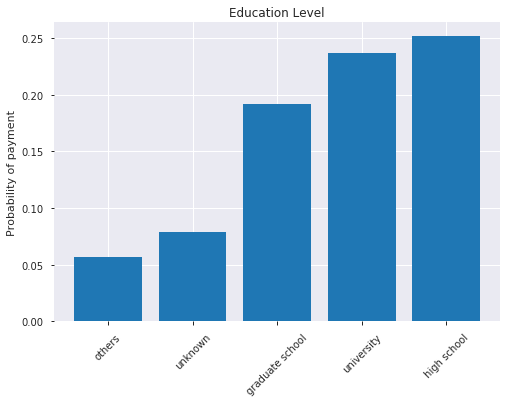

In [81]:
column = 'degree'
temp_df = bank_df.groupby([column])['default_payment_next_month'].mean()
temp_df.sort_values(ascending=True, inplace=True)
temp_df = pd.DataFrame(temp_df)
temp_df.reset_index(inplace=True)
plt.bar(x=temp_df[column], height=temp_df['default_payment_next_month'])
plt.ylabel('Probability of payment')
plt.xticks(rotation=45)
plt.title('Education Level')
plt.show()

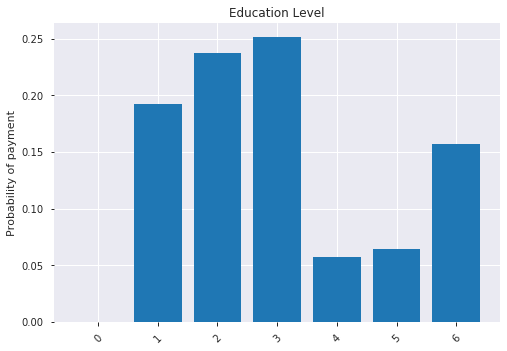

In [82]:
column = 'education_level'
temp_df = bank_df.groupby([column])['default_payment_next_month'].mean()
temp_df.sort_values(ascending=True, inplace=True)
temp_df = pd.DataFrame(temp_df)
temp_df.reset_index(inplace=True)
plt.bar(x=temp_df[column], height=temp_df['default_payment_next_month'])
plt.ylabel('Probability of payment')
plt.xticks(rotation=45)
plt.title('Education Level')
plt.show()

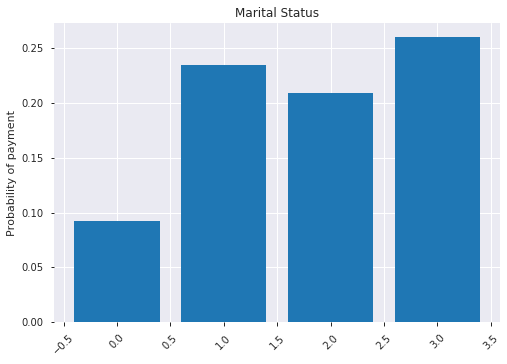

In [83]:
column = 'marital_status'
temp_df = bank_df.groupby([column])['default_payment_next_month'].mean()
temp_df.sort_values(ascending=True, inplace=True)
temp_df = pd.DataFrame(temp_df)
temp_df.reset_index(inplace=True)
plt.bar(x=temp_df[column], height=temp_df['default_payment_next_month'])
plt.ylabel('Probability of payment')
plt.xticks(rotation=45)
plt.title('Marital Status')
plt.show()

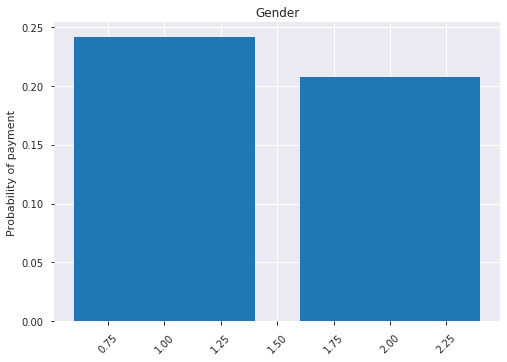

In [91]:
column = 'sex'
temp_df = bank_df.groupby([column])['default_payment_next_month'].mean()
temp_df.sort_values(ascending=True, inplace=True)
temp_df = pd.DataFrame(temp_df)
temp_df.reset_index(inplace=True)
plt.bar(x=temp_df[column], height=temp_df['default_payment_next_month'])
plt.ylabel('Probability of payment')
plt.xticks(rotation=45)
plt.title('Gender')
plt.show()

Let's test the simpliest model on our raw data to have a threshold to compare next models with.

In [85]:
X_train, X_test, y_train, y_test = train_test_split(bank_df.drop(['degree', 'default_payment_next_month'], axis=1), 
                                                    bank_df['default_payment_next_month'], test_size=0.2, random_state=42)

In [87]:
y_train.sum()

5323

In [90]:
rf_model = RandomForestClassifier(oob_score=True, random_state=42)
rf_model.fit(X_train, y_train)
rf_model.score(X_train, y_train), rf_model.score(X_test, y_test), rf_model.oob_score_

(0.9999583333333333, 0.818, 0.8163333333333334)

In [ ]:
rf_model